## **DataFrames**

In [90]:
import pandas as pd
import numpy as np

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

data can be many different things:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

## From dict of Series or dicts

In [91]:
d = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 e    5.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [92]:
d['two']

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [93]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [94]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [95]:
pd.DataFrame(d['one'], index=['d', 'b', 'a'])

,0
d,NaN
b,2.0
a,1.0


In [96]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [97]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'one', 'three'])

,two,one,three
d,4.0,NaN,NaN
b,2.0,2.0,NaN
a,1.0,1.0,NaN


In [98]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [99]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [100]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [101]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [102]:
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [103]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

## From structured or record array

In [104]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [105]:
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [106]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [107]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [108]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [109]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [110]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['first','second'])

,C,A,B
first,b'Hello',1,2.0
second,b'World',2,3.0


In [111]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['second','first'])

,C,A,B
second,b'Hello',1,2.0
first,b'World',2,3.0


## From a list of dicts

In [112]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [113]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [114]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [115]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [116]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## DataFrame.from_dict

In [117]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [118]:
foo_df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))
foo_df.set_index(['A','B'])

,
A,B
1,4
2,5
3,6


In [119]:
bar_df = pd.DataFrame(foo_df)
bar_df

,A,B
0,1,4
1,2,5
2,3,6


**_If you pass orient='index', the keys will be the row labels_**

In [120]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two','three'])

,one,two,three
A,1,2,3
B,4,5,6


# Column selection, addition, deletion

In [121]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(series_dict)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [122]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

## Column addition

In [123]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN
e,5.0,NaN,NaN


In [124]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False
e,5.0,NaN,NaN,True


## Column deletion

In [125]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False
e,5.0,NaN,True


In [126]:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
e    NaN
Name: three, dtype: float64

In [127]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False
e,5.0,True


## Columns insertion

In [128]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar
e,5.0,True,bar


In [129]:
df["one"][4:]

e    5.0
Name: one, dtype: float64

In [130]:
df['one_trunc'] = df["one"][4:]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN
e,5.0,True,bar,5.0


In [131]:
df.insert(4, 'one_clone', df['one'])

In [132]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


# Assigning New Columns in Method Chains

In [133]:
iris = pd.read_csv('data/iris.data')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**_assign always returns a copy of the data, leaving the original DataFrame untouched_**

In [134]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [135]:
iris.assign(sepal_ratio_lambda = lambda x: (x['SepalWidth'] /  x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio_lambda
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [136]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
iris = iris.assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [138]:
iris = iris.assign(PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245,0.142857
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851,0.153846
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913,0.133333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000,0.142857


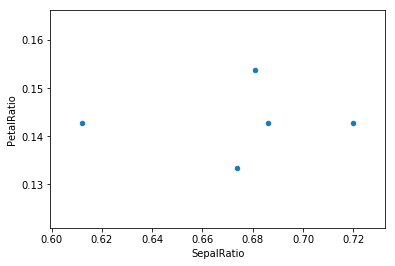

In [139]:
iris.query('SepalLength > 1').plot(kind='scatter', x='SepalRatio', y='PetalRatio')

# Indexing / Selection

In [140]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


## **Select index**

In [141]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## **Select column**

In [142]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [143]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [144]:
df[['one','foo']]

,one,foo
a,1.0,bar
b,2.0,bar
c,3.0,bar
d,NaN,bar
e,5.0,bar


## **Select row by label**

In [145]:
df.loc['a']

one              1
flag         False
foo            bar
one_trunc      NaN
one_clone        1
Name: a, dtype: object

## **Select row by integer location**

In [146]:
df.iloc[0]

one              1
flag         False
foo            bar
one_trunc      NaN
one_clone        1
Name: a, dtype: object

## **Slice rows**

In [147]:
df[0:4]

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN


## **Select rows by boolean vector**

In [148]:
df[1:]

,one,flag,foo,one_trunc,one_clone
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


In [149]:
df[:1]

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0


## Data alignment and arithmetic

In [150]:
np.random.randn(10, 4)

array([[ 0.73999789, -1.13456766, -0.59450656, -1.15131332],
       [-1.06840149, -1.05347806,  0.84794076, -0.11468754],
       [ 0.97166094,  0.54598456,  1.56588178, -0.36986467],
       [-0.52121622,  1.29408829, -1.45339222, -0.05016892],
       [-1.82026356, -1.65742379, -1.16722712, -0.38329523],
       [ 0.64761984,  0.89128606,  0.17925792, -0.36491062],
       [-0.20288897,  0.82117551,  1.3480254 ,  0.42216385],
       [-1.03707905, -0.19385185,  0.52999436, -0.05419676],
       [ 0.53621233, -0.03505728, -0.42121662,  0.25541282],
       [ 0.04369693, -0.85466924,  0.19762241, -0.69399706]])

In [151]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df1 

,A,B,C,D
0,0.565302,-1.916246,1.565523,-0.651273
1,-0.789418,1.442310,0.406648,0.590645
2,0.808301,-0.136356,0.289795,1.918149
3,0.798254,0.408081,-0.447038,-0.332065
4,-1.068828,1.304040,0.216918,0.568055
5,-0.696475,-1.042129,-1.192535,-0.241916
6,1.444831,-0.032905,0.265475,-0.784555
7,0.947631,0.022605,-1.493300,1.157843
8,-0.538708,1.209076,-1.060526,-1.634605
9,-0.388874,0.089865,-0.761666,1.461168


In [152]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df3 = df1 + df2
df3

,A,B,C,D
0,0.288261,-3.072352,1.696734,NaN
1,-1.036816,1.425665,-0.324697,NaN
2,-0.213625,2.302163,1.529137,NaN
3,0.149246,1.585537,0.260855,NaN
4,-0.100663,0.778929,-0.647455,NaN
5,-1.909317,-1.733098,-1.257097,NaN
6,1.199689,-0.179112,-0.866419,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [153]:
df1.iloc[0]

A    0.565302
B   -1.916246
C    1.565523
D   -0.651273
Name: 0, dtype: float64

In [154]:
df3 - df1.iloc[0]

,A,B,C,D
0,-0.277041,-1.156106,0.131211,NaN
1,-1.602118,3.341911,-1.890219,NaN
2,-0.778927,4.218408,-0.036386,NaN
3,-0.416056,3.501783,-1.304667,NaN
4,-0.665965,2.695174,-2.212978,NaN
5,-2.474619,0.183147,-2.822619,NaN
6,0.634387,1.737134,-2.431941,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [155]:
df4 = df3.get(list('ABC'))
df4 = df4[:7]
df4 = df4.abs()
df4

,A,B,C
0,0.288261,3.072352,1.696734
1,1.036816,1.425665,0.324697
2,0.213625,2.302163,1.529137
3,0.149246,1.585537,0.260855
4,0.100663,0.778929,0.647455
5,1.909317,1.733098,1.257097
6,1.199689,0.179112,0.866419


In [156]:
df4 * 5 + 2

,A,B,C
0,3.441303,17.361760,10.483668
1,7.184080,9.128326,3.623483
2,3.068124,13.510815,9.645684
3,2.746232,9.927686,3.304277
4,2.503316,5.894643,5.237277
5,11.546585,10.665490,8.285484
6,7.998443,2.895560,6.332094


## **Boolean operators**

In [157]:
df6 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df7 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [158]:
df6 & df7

,a,b
0,False,False
1,False,True
2,True,False


In [159]:
df6 | df7

,a,b
0,True,True
1,True,True
2,True,True


# **Transposition or Pivot**

In [160]:
df4

,A,B,C
0,0.288261,3.072352,1.696734
1,1.036816,1.425665,0.324697
2,0.213625,2.302163,1.529137
3,0.149246,1.585537,0.260855
4,0.100663,0.778929,0.647455
5,1.909317,1.733098,1.257097
6,1.199689,0.179112,0.866419


In [161]:
df4.T

,0,1,2,3,4,5,6
A,0.288261,1.036816,0.213625,0.149246,0.100663,1.909317,1.199689
B,3.072352,1.425665,2.302163,1.585537,0.778929,1.733098,0.179112
C,1.696734,0.324697,1.529137,0.260855,0.647455,1.257097,0.866419


# **NumPy functions**

In [162]:
np.exp(df4.T)

,0,1,2,3,4,5,6
A,1.334105,2.820223,1.238158,1.160959,1.105904,6.748478,3.319083
B,21.592627,4.160624,9.995779,4.881913,2.179136,5.658156,1.196155
C,5.456097,1.383611,4.614192,1.298040,1.910673,3.515201,2.378378


In [163]:
np.asarray(df4.T)

array([[0.28826067, 1.03681602, 0.21362478, 0.14924638, 0.10066322,
        1.90931693, 1.19968859],
       [3.07235193, 1.4256651 , 2.30216294, 1.58553725, 0.77892859,
        1.73309809, 0.17911197],
       [1.69673361, 0.32469651, 1.52913671, 0.26085541, 0.64745535,
        1.25709682, 0.86641882]])

# CONSOLE print

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
one          4 non-null float64
flag         5 non-null bool
foo          5 non-null object
one_trunc    1 non-null float64
one_clone    4 non-null float64
dtypes: bool(1), float64(3), object(1)
memory usage: 365.0+ bytes


In [165]:
print(df)

   one   flag  foo  one_trunc  one_clone
a  1.0  False  bar        NaN        1.0
b  2.0  False  bar        NaN        2.0
c  3.0   True  bar        NaN        3.0
d  NaN  False  bar        NaN        NaN
e  5.0   True  bar        5.0        5.0


In [166]:
df = pd.DataFrame(np.random.randn(4, 3),index=["first","second","third","fourth"], columns=['A', 'B', 'C'])
df

,A,B,C
first,2.026724,0.472190,0.678270
second,0.582694,-0.281725,2.450034
third,-1.082946,0.682233,0.593347
fourth,1.126466,-0.667100,-0.197145


In [167]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [168]:
df.columns = [x.lower() for x in df.columns]

In [169]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [170]:
df.values

array([[ 2.02672351,  0.47218964,  0.67827012],
       [ 0.58269419, -0.28172496,  2.45003391],
       [-1.0829462 ,  0.682233  ,  0.59334682],
       [ 1.12646617, -0.66710006, -0.19714539]])